## **1.	Outliers**

### **1.10.	Outlier Visualization, Detection, Validation & Document, and Removal (Coding)**

#### **1.10.1.	Interquartile Range (IQR)**

#### **Impute/Import Outlier Dataset from GitHub**

In [73]:
# Import necessary libraries
import pandas as pd

# Load the dataset from github (RAW link)
df = pd.read_csv("https://raw.githubusercontent.com/tabassumgulfaraz-ds/machine_learning_1.0/main/files_and_datasets/f_ds5_III/outlier_dataset.csv")

# check the shape i.e. number of rows and columns also called dimensions of the dataset
print(f"Dataset Shape: {df.shape}")

df

Dataset Shape: (30, 5)


,Age,Income,Height,Weight,Score
0,25,45000,165,68,85
1,30,52000,170,72,78
2,28,48000,168,70,82
3,35,65000,175,80,90
4,22,38000,160,55,75
5,27,50000,172,75,88
6,32,58000,178,82,92
7,29,51000,169,71,80
8,26,47000,166,67,83
9,31,55000,174,78,87


#### **Step 1: Select Appropriate Libraries**

In [74]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Step 2: Visualize Outliers (Boxplots)**

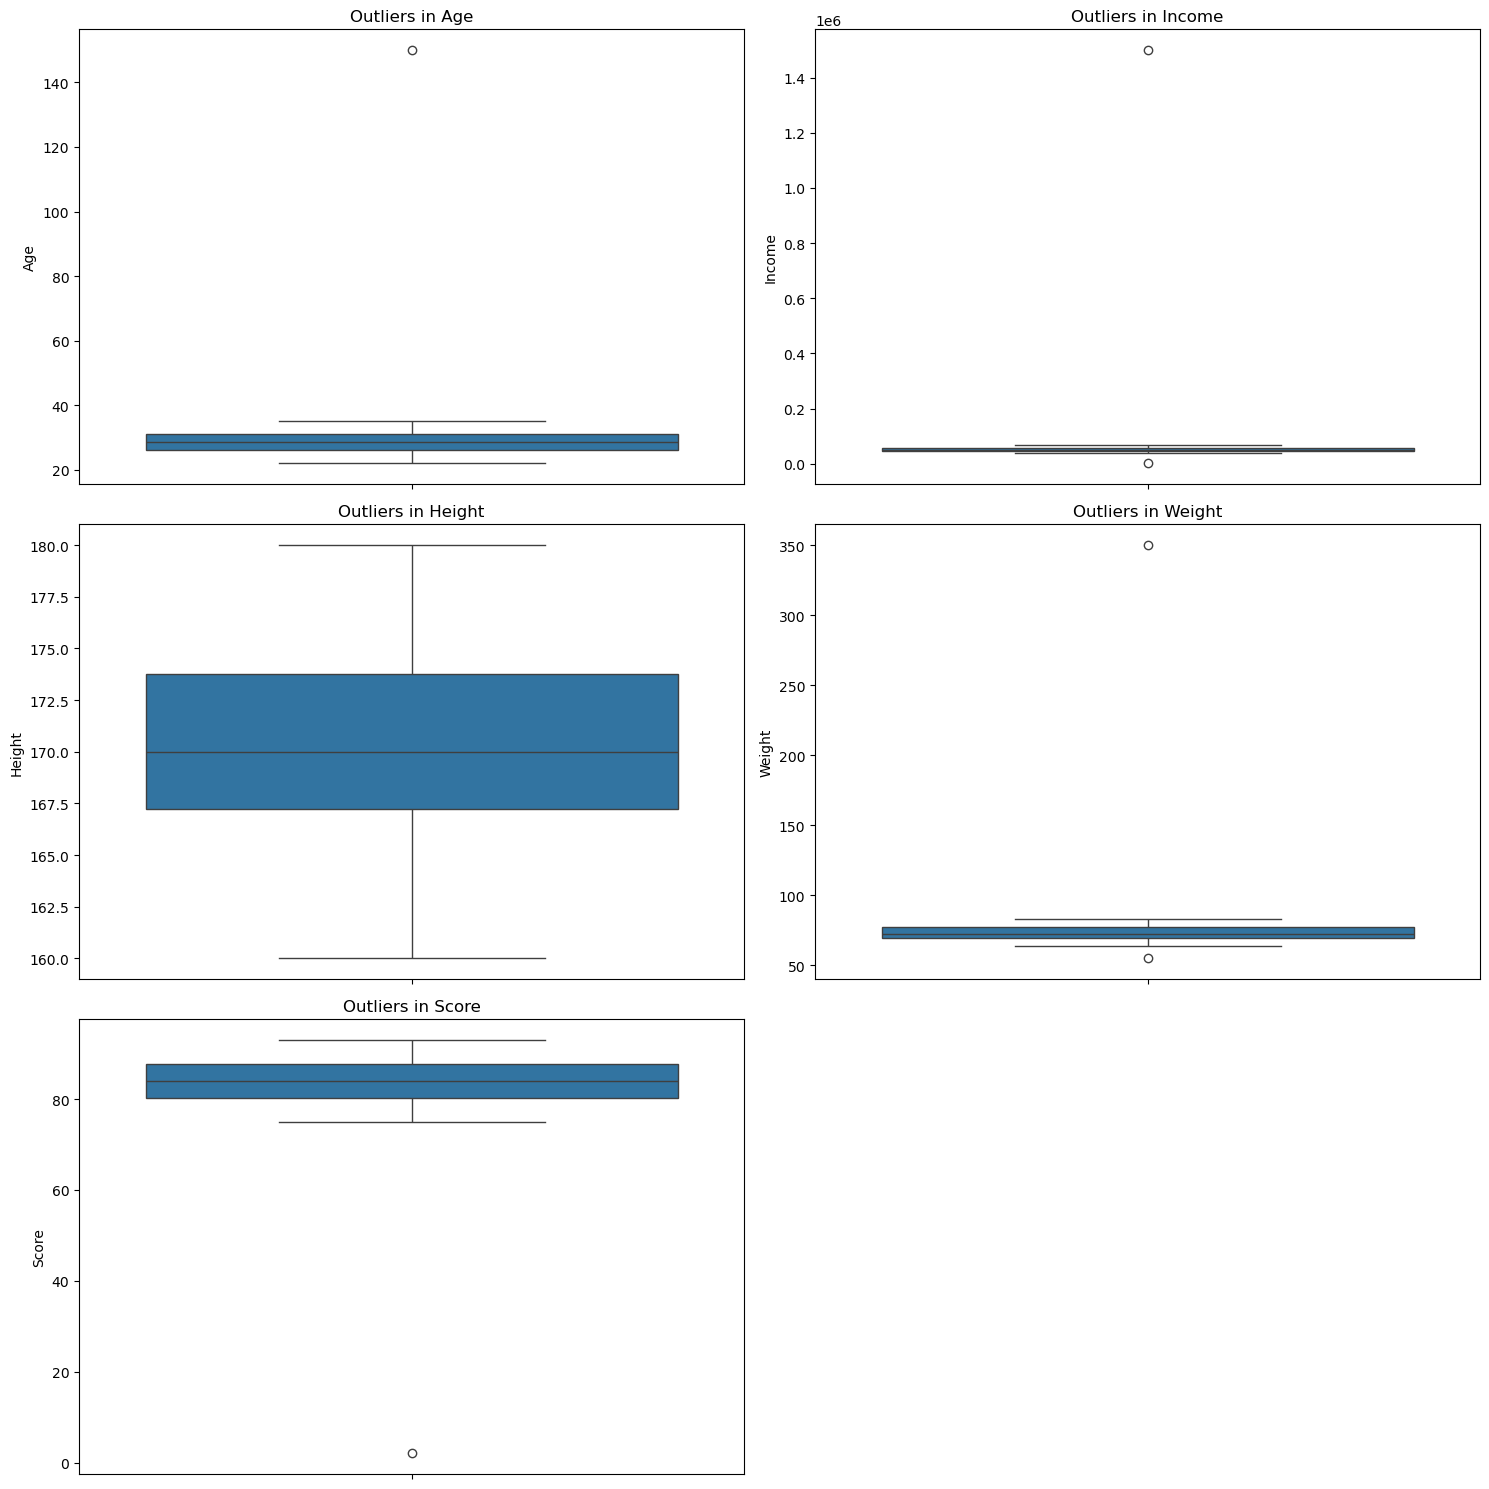

In [75]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Set subplot layout
n_cols = 2   # plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))

# Create boxplot for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#### **STEP 3: Detect Outliers Using IQR Method**

In [76]:
# IQR Outlier Detection

# Select numeric columns
numeric_df = df[numeric_cols]

# Create empty mask to store outlier positions
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_cols)

# Apply IQR formula column-wise
for col in numeric_cols:
    
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mark True where value is outlier
    outlier_mask[col] = (numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)

# Rows where ANY column has outlier
outliers = df[outlier_mask.any(axis=1)]

outliers

,Age,Income,Height,Weight,Score
4,22,38000,160,55,75
10,150,60000,171,73,86
14,30,1500000,173,77,91
22,35,67000,180,350,90
25,24,1200,165,64,78
28,33,63000,176,82,2


#### **Step 4: Validate and Document Result**

In [77]:
# Summary of Outliers

# Total number of outlier rows
print("Total Outlier Rows:", len(outliers))

# Percentage of dataset flagged as outlier
percentage = round((len(outliers) / len(df)) * 100, 2)
print("\nPercentage of Outliers:", percentage, "%")

# Column-wise outlier count
column_outliers = outlier_mask.sum()
print("\nColumn-wise Outlier Count:", column_outliers.to_dict())

Total Outlier Rows: 6

Percentage of Outliers: 20.0 %

Column-wise Outlier Count: {'Age': 1, 'Income': 2, 'Height': 0, 'Weight': 2, 'Score': 1}


#### **Step 5: Apply Removal Method**

In [79]:
# IQR Capping (Winsorization Method)
# Goal:
# Instead of removing rows that contain outliers,
# we will "cap" extreme values to a calculated boundary.
# This keeps dataset shape SAME and makes it ML-friendly.

# Create a copy of the original dataset
df_capped = df.copy()

# Loop through each numeric column
for col in numeric_cols:
    
    # Calculate Q1 (25th percentile)
    Q1 = df[col].quantile(0.25)
    
    # Calculate Q3 (75th percentile)
    Q3 = df[col].quantile(0.75)
    
    # Compute IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values below lower bound
    df_capped[col] = np.where(
        df_capped[col] < lower_bound,
        lower_bound,           # Replace with lower boundary
        df_capped[col]         # Keep original value
    )
    
    # Cap values above upper bound
    df_capped[col] = np.where(
        df_capped[col] > upper_bound,
        upper_bound,           # Replace with upper boundary
        df_capped[col]         # Keep original value
    )

# Check dataset shape (should be SAME as original)
print("Shape after capping:", df_capped.shape)

# Replace original dataset with capped dataset (optional)
df = df_capped.copy()

# Display dataset
df

Shape after capping: (30, 5)


,Age,Income,Height,Weight,Score
0,25.000,45000.0,165.0,68.0,85.0
1,30.000,52000.0,170.0,72.0,78.0
2,28.000,48000.0,168.0,70.0,82.0
3,35.000,65000.0,175.0,80.0,90.0
4,22.000,38000.0,160.0,56.5,75.0
5,27.000,50000.0,172.0,75.0,88.0
6,32.000,58000.0,178.0,82.0,92.0
7,29.000,51000.0,169.0,71.0,80.0
8,26.000,47000.0,166.0,67.0,83.0
9,31.000,55000.0,174.0,78.0,87.0


In [ ]:
# Alternative: Remove detected outliers (Remove rows with ANY outlier)

# Keep only rows WITHOUT outliers
# df_clean = df[~outlier_mask.any(axis=1)]

# Reset index (optional but recommended for ML)
# df_clean = df_clean.reset_index(drop=True)

# print("Cleaned Shape:", df_clean.shape)

# copy the cleaned dataset to a new variable for further processing
# df = df_clean.copy()
# df

Cleaned Shape: (24, 5)


,Age,Income,Height,Weight,Score
0,25,45000,165,68,85
1,30,52000,170,72,78
2,28,48000,168,70,82
3,35,65000,175,80,90
4,27,50000,172,75,88
5,32,58000,178,82,92
6,29,51000,169,71,80
7,26,47000,166,67,83
8,31,55000,174,78,87
9,24,49000,167,69,81


#### **STEP 6: Detect Outliers Using IQR Method (step 3 repeat - Optional)**

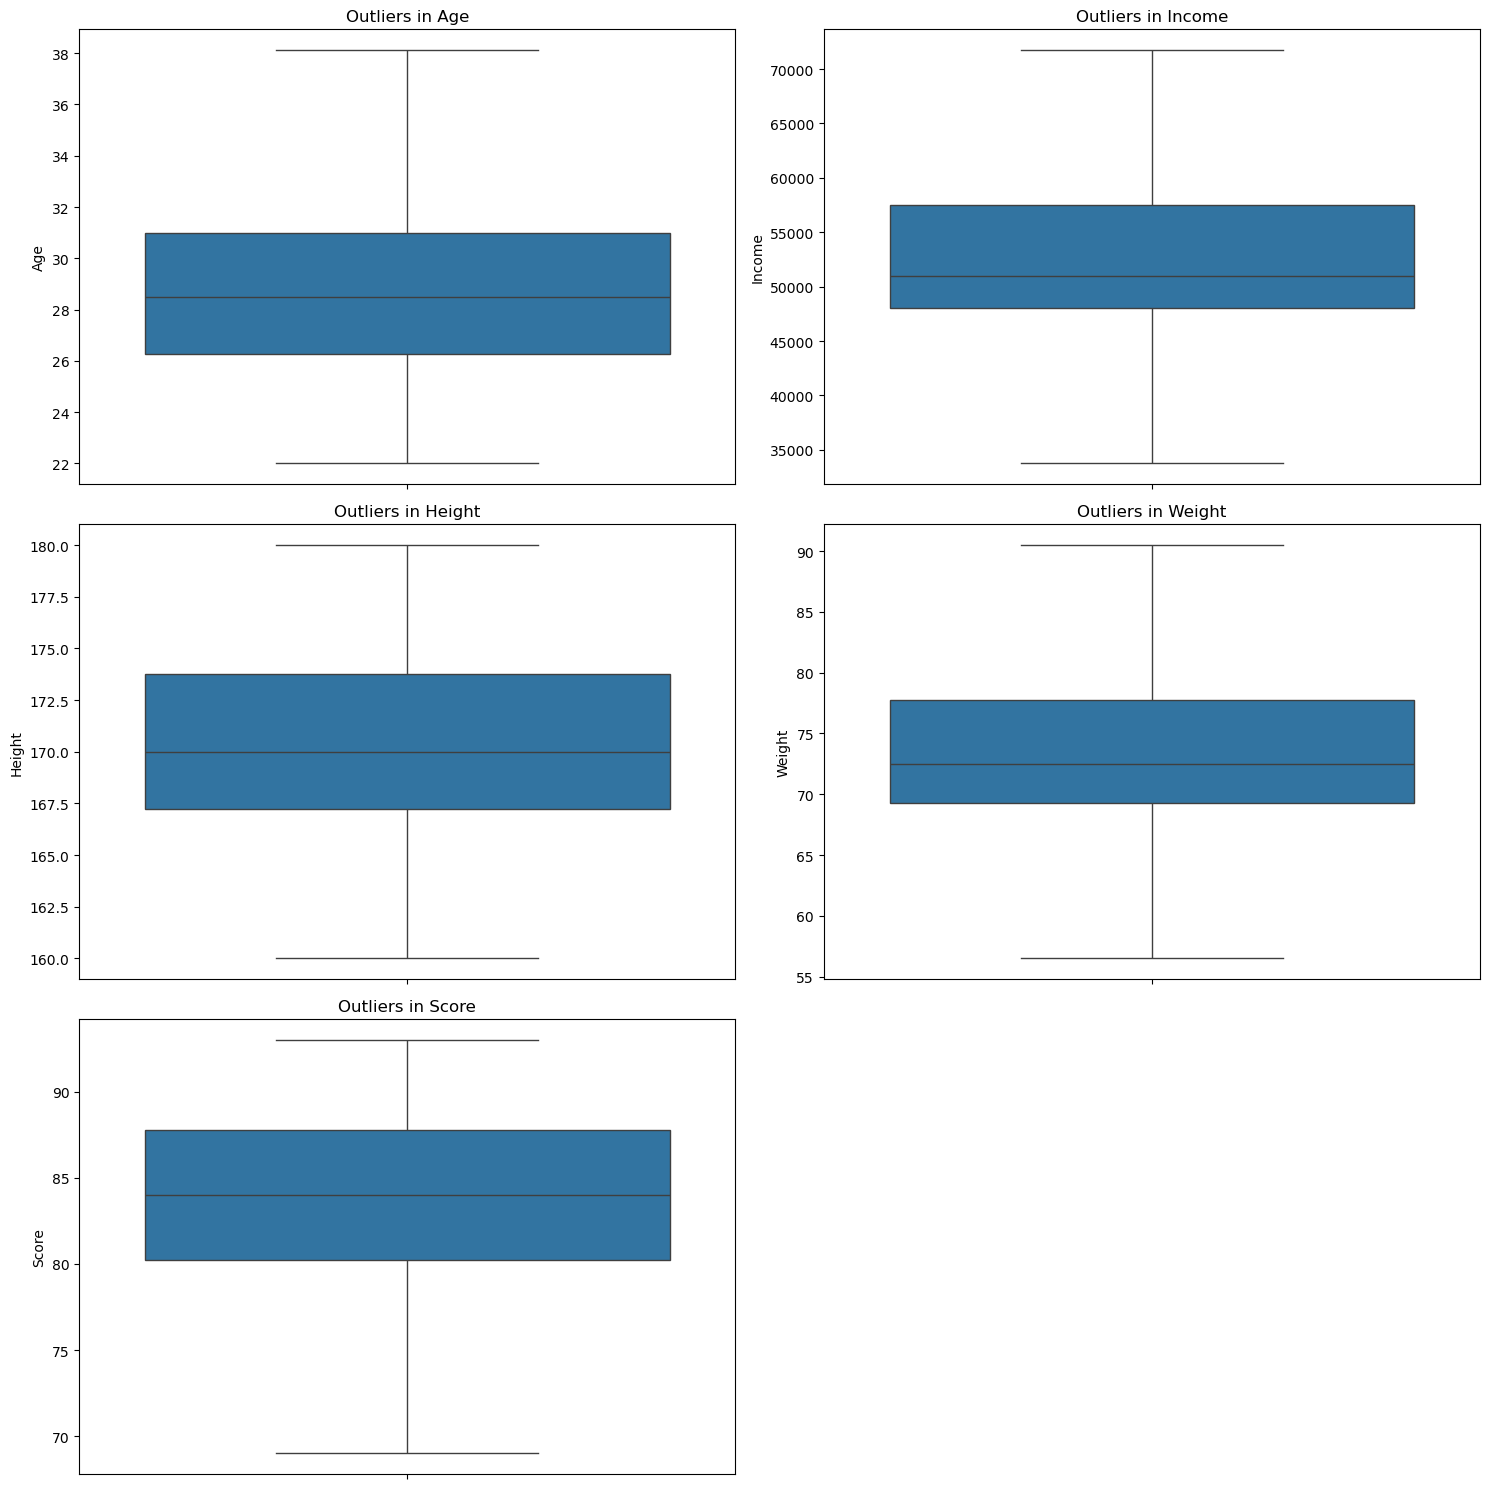

In [80]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Set subplot layout
n_cols = 2   # plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))

# Create boxplot for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Save cleaned dataset to a new CSV file (optional-local)
df.to_csv("cleaned_dataset.csv", index=False)